In [140]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.preprocessing import LabelEncoder

In [141]:
data = pd.read_csv(r"C:\Users\arwah\OneDrive\سطح المكتب\machine_learning_projects_17_portfolio\day_1_project\spam.csv", encoding='cp1252')

In [142]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN


# Data cleaning 

In [143]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5"],axis=1,inplace=True)


In [144]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [146]:
print(data["v1"].value_counts())
# unplanced data set

v1
ham     4825
spam     747
Name: count, dtype: int64


In [147]:
data=data.rename(columns={
    "v1": "target",
    "v2":"SMS text"
})
data.head()

,target,SMS text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
encoder=LabelEncoder()
data["target"]=encoder.fit_transform(data["target"])
data.head()

'''
ham =0
spam =1
'''

'\nham =0\nspam =1\n'

In [149]:
data.duplicated().sum()

403

In [150]:
data=data.drop_duplicates(keep='first')

In [151]:
print(data["target"].value_counts())
# unplanced data set = classes are not represented equally.
print("ratio between classes is :",747/4825)

target
0    4516
1     653
Name: count, dtype: int64
ratio between classes is : 0.15481865284974095


# EDA

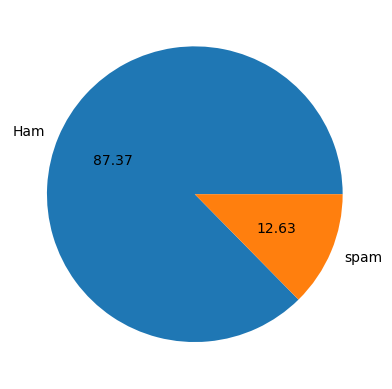

In [152]:
plt.pie(data["target"].value_counts(),labels=["Ham","spam"],autopct="%0.2f")
plt.show()

In [153]:
# extract number of characters
data["number of letters"]=data["SMS text"].apply(len)
data.head()

,target,SMS text,number of letters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [154]:
import nltk
nltk.data.path.append("C:/nltk_data")
nltk.download('punkt', download_dir="C:/nltk_data")

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.data.path.append("C:/nltk_data")  
#data["words"] = data["SMS text"].apply(lambda x: word_tokenize(str(x)))


data["number_words"] = data["SMS text"].apply(lambda x: len(word_tokenize(str(x))))

data["number_sentences"] = data["SMS text"].apply(lambda x: len(sent_tokenize(str(x))))


data.head()

,target,SMS text,number of letters,number_words,number_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [156]:
data_ham=data[data["target"]==0]
data_ham.describe()

,target,number of letters,number_words,number_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.684234,17.123782,1.820195
std,0.0,56.435582,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [157]:
data_spam=data[data["target"]==1]
data_spam.describe()

'''
average number of sentences,words,letters tend to be larger in spam
'''

'\naverage number of sentences,words,letters tend to be larger in spam\n'

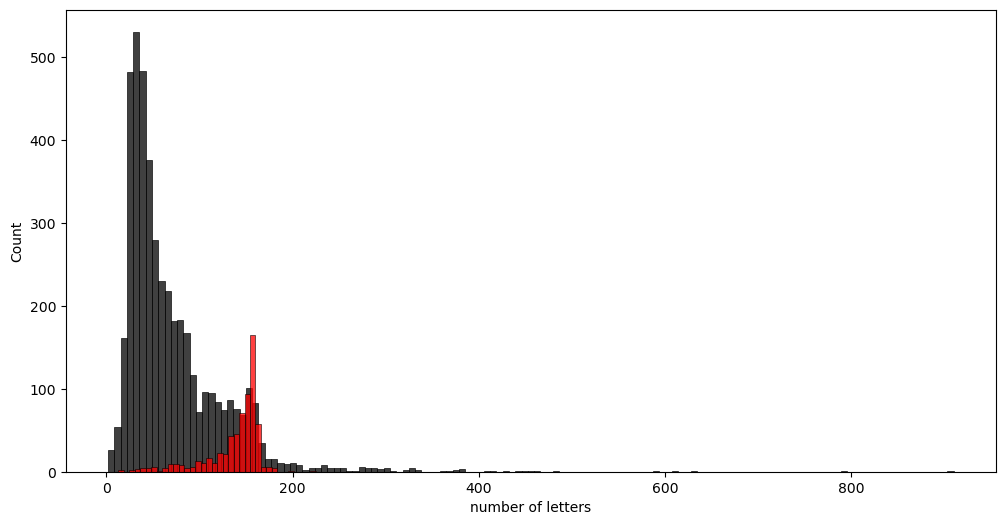

'\nmost of samples   in ham have 80 letteres >> less letters than spam \nmost of samples   in spam have 160 letteres\n\n'

In [158]:
plt.figure(figsize=(12,6))
sns.histplot(data_ham["number of letters"],color="black",legend=True)
sns.histplot(data_spam["number of letters"],color="red")
plt.show()

'''
most of samples   in ham have 80 letteres >> less letters than spam 
most of samples   in spam have 160 letteres

'''

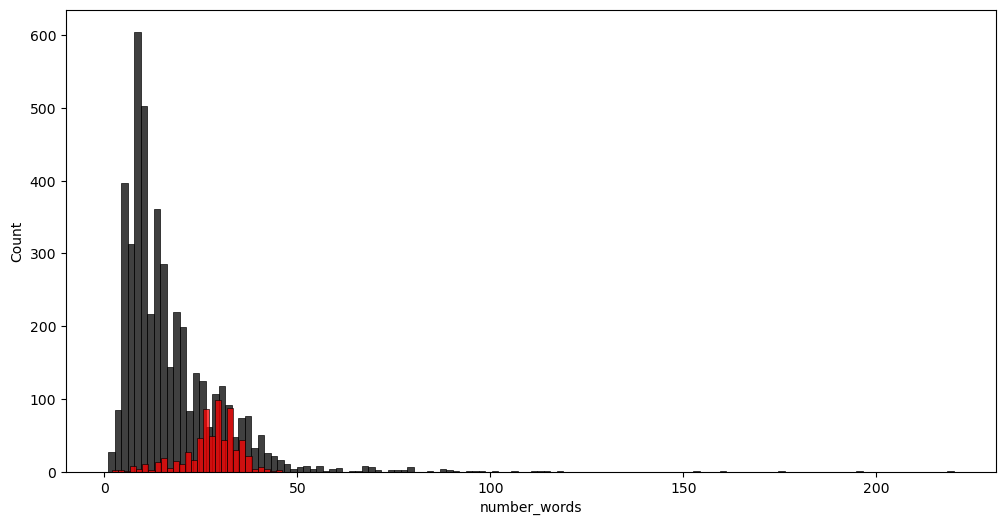

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(data_ham["number_words"],color="black",legend=True)
sns.histplot(data_spam["number_words"],color="red")
plt.show()
# spam has more sentences

<Figure size 1200x600 with 0 Axes>

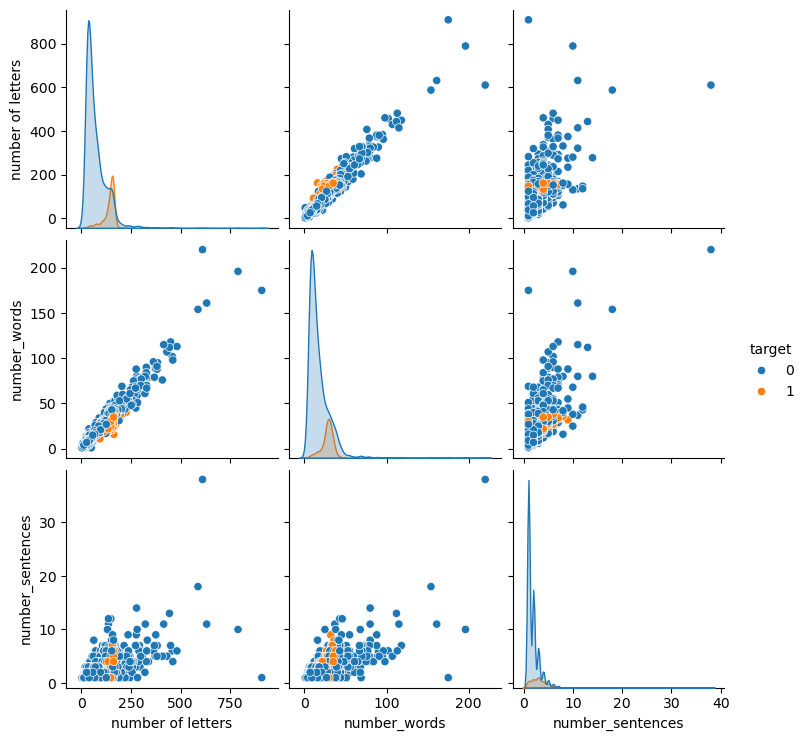

In [160]:
plt.figure(figsize=(12,6))
sns.pairplot(data,hue="target")

In [161]:
numeric_data=data.select_dtypes(include=["number"])
numeric_data.corr()

,target,number of letters,number_words,number_sentences
target,1.000000,0.385347,0.262912,0.263939
number of letters,0.385347,1.000000,0.965263,0.623515
number_words,0.262912,0.965263,1.000000,0.679971
number_sentences,0.263939,0.623515,0.679971,1.000000


'\nham messages are more diverse in length. That overlap reduces the strength of linear correlation\n'

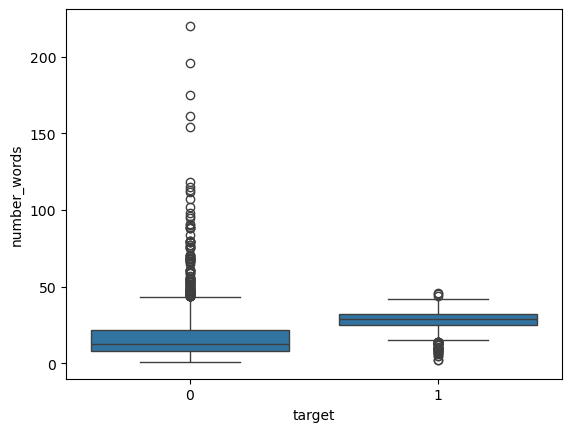

In [162]:
sns.boxplot(x='target', y='number_words', data=data)

'''
ham messages are more diverse in length. That overlap reduces the strength of linear correlation
'''

In [163]:
import nltk
nltk.data.path.append("C:/stop_word_data")
nltk.download('stopwords', download_dir="C:/stop_word_data")
nltk.data.path.append("C:/stop_word_data") 



[nltk_data] Downloading package stopwords to C:/stop_word_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

# Text preproccesing

ps = PorterStemmer()

def pre_text(text_in):
    text=text_in.lower()
    text=nltk.word_tokenize(text)
    text=text
    final_list=[]
    for i in text:
        if i not in stopwords.words('english') and  i.isalnum() :
            final_list.append(ps.stem(word=i))

    return " ".join(final_list)





'''
**NLTK functions (like stem() and stopwords.words()) don’t benefit from NumPy:**
***They’re pure Python loops, not optimized for NumPy arrays.***
***So converting to np.array() just adds overhead without speeding things up.***
***calling it inside the loop means you're reloading the entire list of stopwords for every single row/message in your datase***

***
Yes, doing these operations per row is necessary—but reloading stopwords each time inside the loop 
is what makes things worse.
Minimizing repeated work = smoother, faster code!
***

 

***
Type conversions slow things down: 
Creating arrays with np.array(text) and again with np.array(final_list) introduces extra memory allocation 
and conversion time, especially since you're still looping element by element.
***
***
Repeated stopwords loading: In every iteration of the loop,
you're calling stopwords.words('english')—which reloads the entire list each time. That’s a sneaky performance sink

***


'''


```python
import numpy as np
arr = np.array([1, 2, 3])
result = arr + 1
```

### 🧠 What’s Really Going On?

When you write `arr + 1`, NumPy doesn’t loop through each element in Python like:

```python
for i in range(len(arr)):
    arr[i] += 1
```

Instead, it uses **vectorized operations**, which are powered by **compiled C code under the hood**. This means:

- The entire array is passed to a **low-level function** written in C.
- That function performs the addition on **entire memory blocks** at once.
- No Python-level loops = **massive speed boost**.

***
### 🧬 Why It’s So Fast:
1. **Contiguous memory layout**: NumPy arrays are stored in tightly packed memory blocks (unlike Python lists), which makes them cache-friendly and fast to access.
2. **SIMD instructions**: On modern CPUs, NumPy can use **Single Instruction, Multiple Data** operations—meaning it can add 1 to multiple elements **in parallel**.
3. **No type checking per element**: Since all elements in a NumPy array are the same type, NumPy doesn’t waste time checking types like Python does.

****
### 🧪 Analogy:
Imagine you’re stamping 1 onto a stack of papers:
- Python loop = stamping each page one by one.
- NumPy = using a machine that stamps the whole stack in one go.

### Bonus: Broadcasting
When you do `arr + 1`, NumPy uses **broadcasting** to stretch the scalar `1` across the shape of the array so it can apply the operation element-wise.

---


If there isn’t enough **adjacent (contiguous) memory** available, NumPy can’t create the array—and you’ll likely get a `MemoryError`.

Here’s why that happens:

### 🧠 NumPy’s Memory Model
NumPy arrays are stored in **contiguous blocks of memory**. That means all the elements are laid out side by side in RAM. This layout is what allows NumPy to perform **vectorized operations** so efficiently.

But if your system’s memory is:
- **Too fragmented** (lots of small free chunks, but not one big enough),
- Or **too full** (not enough total free space),

then NumPy can’t find a large enough continuous block to store the array—even if the total free memory seems sufficient.

### 🧨 What Happens Then?
You’ll see an error like:

```python
MemoryError: Unable to allocate X GiB for an array with shape ...
```

This means NumPy tried to reserve a big chunk of memory, but the system couldn’t provide it in one piece.

---

### 🛠 What You Can Do:
- **Use smaller data types**: e.g., `float32` instead of `float64`.
- **Process data in chunks**: Don’t load everything at once.
***
- **Use memory-mapped arrays**: With `np.memmap`, you can work with data on disk as if it were in memory. تحفة اللهم بارك
***
- **Free up memory**: Delete unused variables with `del` and run `gc.collect()` to trigger garbage collection.

سبحان من علم الانسان مالم يعلم 
سبحان من خلق في الانسان القدرة علي السؤال وربط المعلومات 
شوية المعلومات برعاية  مش عارفها ؟ ولا خدتها بس مكنتش تعرف ان دة استعمالها ؟
اللهم ابدلني خيرا من هندسة الازهر بنات 
ومكني من العلم وافتح لي ابواب الفهم والعلم والسؤال وسدد سؤالي وارزقني تقواك امين

In [165]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))  # only once

def pre_text(text_in):
    text = text_in.lower()
    tokens = nltk.word_tokenize(text)
    final_list = []

    for word in tokens:
        if word.isalnum() and word not in stop_words:
            final_list.append(ps.stem(word))

    return " ".join(final_list)


In [166]:
data["transformed_text"]=data["SMS text"].apply(pre_text)

'''
The function is being called once for every row in your dataset.

function it self contain 3 loops :)


'''

'\nThe function is being called once for every row in your dataset.\n\nfunction it self contain 3 loops :)\n\n\n'

In [167]:
data.head(5)

,target,SMS text,number of letters,number_words,number_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


'\nThe WordCloud.generate() method expects a single string, not a list or Series. So .str.cat()\nis the bridge that turns your column of messages into one big blob of text for visualization.\n\n'

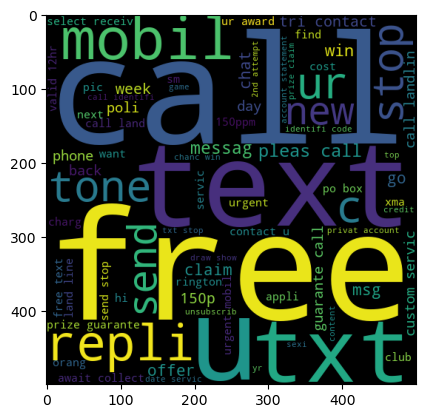

In [168]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color="black",min_font_size=10)
spam_cloud=wc.generate(data[data["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_cloud)

'''
The WordCloud.generate() method expects a single string, not a list or Series. So .str.cat()
is the bridge that turns your column of messages into one big blob of text for visualization.

'''

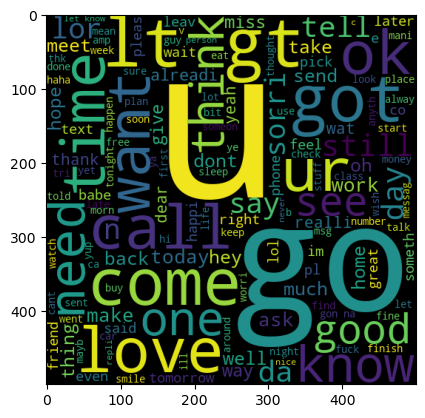

In [169]:
ham_cloud=wc.generate(data[data["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_cloud)

In [170]:
from collections import Counter
words_spam=[]
for sen in data[data["target"]==1]["transformed_text"].to_list():
    for word in sen.split():
        words_spam.append(word)

# words


words_ham=[]
for sen in data[data["target"]==0]["transformed_text"].to_list():
    for word in sen.split():
        words_ham.append(word)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

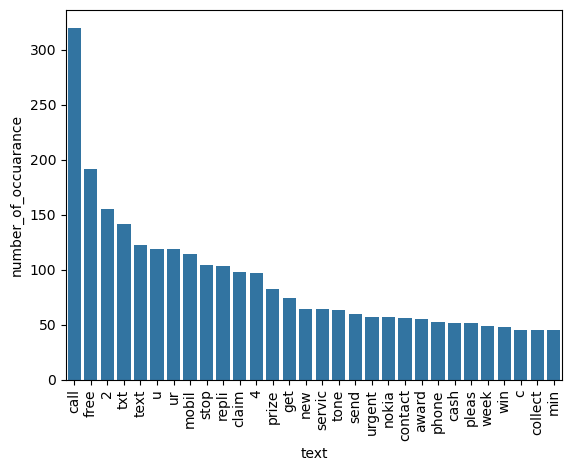

In [171]:
spam=pd.DataFrame(Counter(words_spam).most_common(30))
spam=spam.rename(columns={0:"text",1
                     :"number_of_occuarance"})
sns.barplot(x='text', y='number_of_occuarance', data=spam)
plt.xticks(rotation="vertical")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

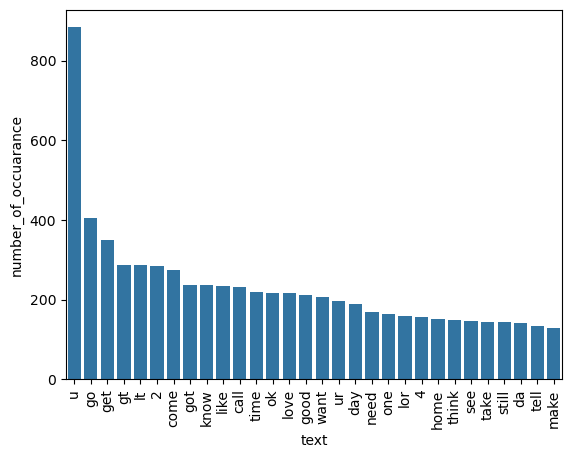

In [172]:
ham=pd.DataFrame(Counter(words_ham).most_common(30))
ham=ham.rename(columns={0:"text",1
                     :"number_of_occuarance"})
sns.barplot(x='text', y='number_of_occuarance', data=ham)
plt.xticks(rotation="vertical")

# Model building

In [173]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
cv=CountVectorizer()

x=cv.fit_transform(data["transformed_text"]).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [174]:
x.shape

(5169, 6674)

In [175]:
y=data["target"]
y.shape

(5169,)

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


خليني أجاوبك بشكل عملي بناءً على استخدامك لـ **CountVectorizer**:

### 🧠 CountVectorizer بيعمل إيه بالضبط؟
- بيحوّل كل مستند إلى فيكتور (قائمة أرقام)، كل رقم فيه بيمثل **عدد مرات تكرار كلمة معينة** في المستند.
- يعني الناتج بيكون **قيم عددية موجبة (0، 1، 2، ...)** → مش مجرد وجود أو غياب.

---

### طيب في الحالة دي نستخدم مين؟
✅ **Multinomial Naive Bayes** هو الأفضل هنا لأن:
- هو مصمم أصلاً يتعامل مع التكرار.
- كل ما الكلمة تتكرر أكتر في مستند معين، كل ما بتأثر أكتر على قرار التصنيف.
  
❌ **Bernoulli Naive Bayes**:
- هيحوّل الأرقام لـ 0 أو 1 (ظهور أو غياب فقط)، فبيفقد معلومة مهمة: عدد المرات اللي الكلمة ظهرت فيها.
- وده ممكن يقلل من دقة النموذج خصوصًا لو التكرار له معنى في السياق.

---

### استثناء بسيط:
لو عملتي على CountVectorizer إعداد `binary=True`، ساعتها هيطلعلك بيانات binary (0 أو 1 بس). فلو عملتي كده، **Bernoulli ممكن يناسب**.

---

يعني باختصار:
- **CountVectorizer (default)** ⟶ استخدمي **Multinomial**.
- **CountVectorizer(binary=True)** ⟶ ممكن تجربي **Bernoulli**.



لنتيجة المتوقعة:
لو التكرار له تأثير واضح في البيانات → Multinomial هيكون أدق.

لو مجرد ظهور الكلمة كفاية → Bernoulli هيشتغل كويس.

الفرق أحيانًا بسيط، بس بيبان أكتر في precision/recall، خصوصًا مع كلمات مميزة قليل تكرارها.

In [177]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,recall_score
MLN=MultinomialNB()
BRN=BernoulliNB()


# Bernoulli NB

In [178]:
BRN.fit(x_train,y_train)
y_predicted=BRN.predict(x_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))


0.9661508704061895
[[885   4]
 [ 31 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



# Multinomial NB

In [179]:
MLN.fit(x_train,y_train)
y_predicted=BRN.predict(x_test)
accuracy_score(y_test,y_predicted)


0.9661508704061895

# TF-IDF Vectorization

In [180]:
tf=TfidfVectorizer()
x_tf=tf.fit_transform(data["transformed_text"]).toarray()
x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(x_tf,y,test_size=0.2,random_state=42)

In [181]:
first_trial=len(tf.vocabulary_)

In [182]:
BRN.fit(x_train_tf,y_train_tf)
y_predicted_tf=BRN.predict(x_test_tf)
print(accuracy_score(y_test_tf,y_predicted_tf))
print(confusion_matrix(y_test_tf,y_predicted_tf))
print(classification_report(y_test_tf,y_predicted_tf))

0.9661508704061895
[[885   4]
 [ 31 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [183]:
MLN.fit(x_train_tf,y_train_tf)
y_predicted=MLN.predict(x_test_tf)
accuracy_score(y_test_tf,y_predicted)
print(accuracy_score(y_test_tf,y_predicted))
print(confusion_matrix(y_test_tf,y_predicted))
print(classification_report(y_test_tf,y_predicted))
# الموديل اكتشف بس 73 في المية من السبام 

0.9613152804642167
[[888   1]
 [ 39 106]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.73      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier


In [185]:
logistic=LogisticRegression(penalty="l1",solver="liblinear")
svmc=SVC(kernel="sigmoid",gamma=0.1)
random_f=RandomForestClassifier(n_estimators=50,random_state=2)
ada=AdaBoostClassifier(n_estimators=50,random_state=2)
grad=GradientBoostingClassifier(n_estimators=50,random_state=2)
bag=BaggingClassifier(n_estimators=50,random_state=2)
E_T=ExtraTreesClassifier(n_estimators=50,random_state=2)
MLN=MultinomialNB()
KNN=KNeighborsClassifier()


In [186]:

models={
    "SVC":svmc,
    "RandomForestClassifier":random_f,
    "AdaBoostClassifier":ada,
    "GradientBoostingClassifier":grad,
    "BaggingClassifier":bag,
    "ExtraTreesClassifier":E_T,
    "MultinomialNB":MLN,
    "LogisticRegression":logistic,
    "KNeighborsClassifier":KNN
}


def fit_function(model,x_train_tf,y_train_tf,x_test_tf,y_test_tf):
    model.fit(x_train_tf,y_train_tf)
    y_predicted=model.predict(x_test_tf)
    accuracy=accuracy_score(y_test_tf,y_predicted)
    precision=precision_score(y_test_tf,y_predicted)
    recall=recall_score(y_test_tf,y_predicted)
    return accuracy,precision,recall


accuracy_list=[]
precision_list=[]
recall_list=[]

for model_name,model in models.items():
    current_acc,current_per,curr_recall=fit_function(model,x_train_tf,y_train_tf,x_test_tf,y_test_tf)
    accuracy_list.append(current_acc)
    precision_list.append(current_per)
    recall_list.append(curr_recall)


    print("model name :",model_name)
    print("model accuarcy :",current_acc)
    print("model percision :",current_per)
    print("model recall :",curr_recall)

    print("_____________________________________")




model name : SVC
model accuarcy : 0.9110251450676983
model percision : 0.9818181818181818
model recall : 0.3724137931034483
_____________________________________
model name : RandomForestClassifier
model accuarcy : 0.9680851063829787
model percision : 0.9912280701754386
model recall : 0.7793103448275862
_____________________________________


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


model name : AdaBoostClassifier
model accuarcy : 0.9477756286266924
model percision : 0.8421052631578947
model recall : 0.7724137931034483
_____________________________________
model name : GradientBoostingClassifier
model accuarcy : 0.9497098646034816
model percision : 0.9514563106796117
model recall : 0.6758620689655173
_____________________________________
model name : BaggingClassifier
model accuarcy : 0.9584139264990329
model percision : 0.8642857142857143
model recall : 0.8344827586206897
_____________________________________
model name : ExtraTreesClassifier
model accuarcy : 0.9738878143133463
model percision : 0.9916666666666667
model recall : 0.8206896551724138
_____________________________________
model name : MultinomialNB
model accuarcy : 0.9613152804642167
model percision : 0.9906542056074766
model recall : 0.7310344827586207
_____________________________________
model name : LogisticRegression
model accuarcy : 0.9439071566731141
model percision : 0.865546218487395
model r

In [187]:
# data frame for accuracy and precision  for algorithms
accuracy_list=np.array(accuracy_list)
precision_list=np.array(precision_list)
recall_list=np.array(recall_list)

accuracy_precision_data_frame=pd.DataFrame({"ALGORITM":models.keys(),"accuracy":accuracy_list,"precision":precision_list,"recall":recall_list})
accuracy_precision_data_frame=accuracy_precision_data_frame.sort_values("precision",ascending=False).set_index("ALGORITM").reset_index()
accuracy_precision_data_frame

,ALGORITM,accuracy,precision,recall
0,KNeighborsClassifier,0.896518,1.000000,0.262069
1,ExtraTreesClassifier,0.973888,0.991667,0.820690
2,RandomForestClassifier,0.968085,0.991228,0.779310
3,MultinomialNB,0.961315,0.990654,0.731034
4,SVC,0.911025,0.981818,0.372414
5,GradientBoostingClassifier,0.949710,0.951456,0.675862
6,LogisticRegression,0.943907,0.865546,0.710345
7,BaggingClassifier,0.958414,0.864286,0.834483
8,AdaBoostClassifier,0.947776,0.842105,0.772414


In [188]:
# try to minimize number of features 
tf=TfidfVectorizer(max_features=3000)
x_tf=tf.fit_transform(data["transformed_text"]).toarray()
x_train_tf_3,x_test_tf_3,y_train_tf_3,y_test_tf_3=train_test_split(x_tf,y,test_size=0.2,random_state=42)

In [193]:
print("____________________________")
print("________ TF with 3000 features preformance______________")
print("____________________________")


accuracy_list3=[]
precision_list3=[]
recall_list3=[]

for model_name,model in models.items():
    current_acc,current_per,current_recall=fit_function(model,x_train_tf_3,y_train_tf_3,x_test_tf_3,y_test_tf_3)
    accuracy_list3.append(current_acc)
    precision_list3.append(current_per)
    recall_list3.append(current_recall)
    
    print("model name :",model_name)
    print("model accuarcy :",current_acc)
    print("model percision :",current_per)
    print("model recall :",current_recall)

    
    print("_____________________________________")

____________________________
________ TF with 3000 features preformance______________
____________________________
model name : SVC
model accuarcy : 0.9284332688588007
model percision : 0.9733333333333334
model recall : 0.503448275862069
_____________________________________
model name : RandomForestClassifier
model accuarcy : 0.9700193423597679
model percision : 0.9913793103448276
model recall : 0.7931034482758621
_____________________________________


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


model name : AdaBoostClassifier
model accuarcy : 0.9535783365570599
model percision : 0.8646616541353384
model recall : 0.7931034482758621
_____________________________________
model name : GradientBoostingClassifier
model accuarcy : 0.9497098646034816
model percision : 0.9603960396039604
model recall : 0.6689655172413793
_____________________________________
model name : BaggingClassifier
model accuarcy : 0.9555125725338491
model percision : 0.8461538461538461
model recall : 0.8344827586206897
_____________________________________
model name : ExtraTreesClassifier
model accuarcy : 0.9758220502901354
model percision : 0.96875
model recall : 0.8551724137931035
_____________________________________
model name : MultinomialNB
model accuarcy : 0.9729206963249516
model percision : 0.9915966386554622
model recall : 0.8137931034482758
_____________________________________
model name : LogisticRegression
model accuarcy : 0.9477756286266924
model percision : 0.8760330578512396
model recall : 0.

In [201]:
'''
so i save so at every time a new data come it should go throw our vectorizer first so we get results closer
 to what we have trained  , 
as the new words should be vectorized as same as the word in the train data set
'''
import pickle
pickle.dump(tf,open("tf.pickle","wb"))
pickle.dump(MLN,open("model.pickle","wb"))


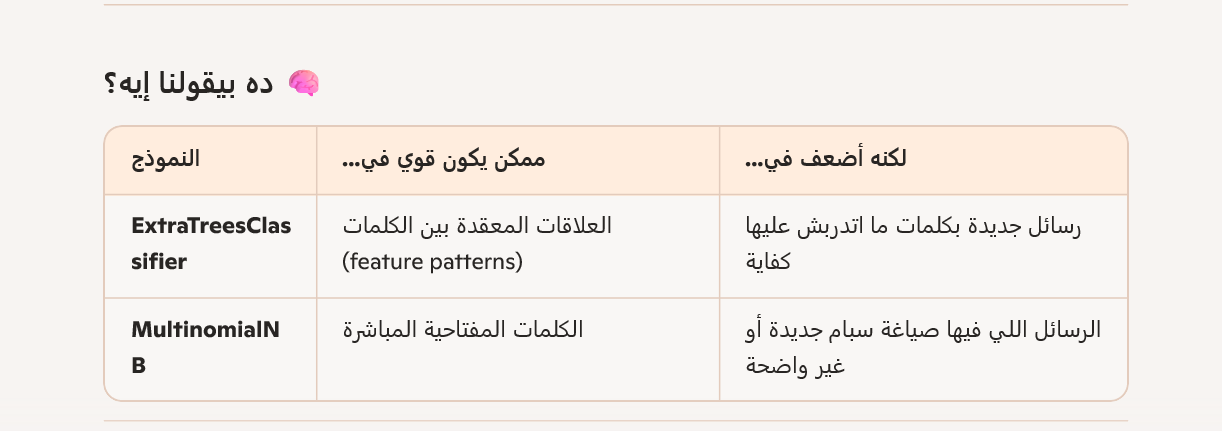